# Some visualizations

In [1]:
import numpy as np # numerical python
import pandas as pd # data processing
import matplotlib as plt2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import seaborn as sns #statistical data visualization
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm 
import pylab as py 
#import wordcloud
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import re
#from PIL import Image
import plotly as plt3
plt3.offline.init_notebook_mode(connected=True)
import plotly.express as px
import scipy as sp
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.io as pio

import warnings#ignore warnings
warnings.filterwarnings("ignore")


print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Matplotlib version:",plt2.__version__)
print("Seaborn version:",sns.__version__)
#print("Wordcloud version:",wordcloud.__version__)
#print("Image version:",Image.__version__)
print("Plotly version:",plt3.__version__)

Pandas version: 1.1.3
Numpy version: 1.19.2
Matplotlib version: 3.3.4
Seaborn version: 0.11.0
Plotly version: 4.6.0


In [2]:
train = pd.read_csv("C:\\Users\\Semi\\Desktop\\python\\Python101\\data\\train.csv")
test = pd.read_csv("C:\\Users\\Semi\\Desktop\\python\\Python101\\data\\test.csv")
gender_submission = pd.read_csv("C:\\Users\\Semi\\Desktop\\python\\Python101\\data\\gender_submission.csv")
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna("G6")
train["Embarked"] = train["Embarked"].fillna("Q")
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [3]:
import plotly.graph_objects as px
import numpy as np
# creating random data through randomint
# function of numpy.random
np.random.seed(42)
  
# Data to be Plotted
random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)
  
plot = px.Figure(data=[px.Scatter(
    x=random_x,
    y=random_y,
    mode='markers',)
])
# Add dropdown
plot.update_layout(title = 'Fare/Age',
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
            direction="down",
        ),
    ]
)
  
plot.show()
#train.head()

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import numpy as np
import plotly

y1 = np.random.randn(200) - 1
y2 = np.random.randn(200)
y3 = np.random.randn(200) + 1
x = np.linspace(0, 1, 200)

colors = ['#3f3f3f', '#00bfff', '#ff7f00']

fig = make_subplots(
    rows=3, cols=2,



    column_widths=[0.55, 0.45],
    


    row_heights=[1., 1., 1.],
    specs=[[{"type": "scatter"}, {"type": "xy"}],
           [{"type": "scatter"}, {"type": "xy", "rowspan": 2}],
           [{"type": "scatter"},            None           ]])


fig.add_trace(
    go.Scatter(x = x, 
                y = y1,
                hoverinfo = 'x+y',
                mode='lines',
                line=dict(color='#3f3f3f',
                width=1),
                showlegend=False,
                ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x = x, 
                y = y2,
                hoverinfo = 'x+y',
                mode='lines',
                line=dict(color='#00bfff',
                width=1),
                showlegend=False,
                ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x = x, 
                y = y3,
                hoverinfo = 'x+y',
                mode='lines',
                line=dict(color='#ff7f00',
                width=1),
                showlegend=False,
                ),
    row=3, col=1
)


boxfig= go.Figure(data=[go.Box(x=y1, showlegend=False, notched=True, marker_color="#3f3f3f", name='3'),
                        go.Box(x=y2, showlegend=False, notched=True, marker_color="#00bfff", name='2'),
                        go.Box(x=y3, showlegend=False, notched=True, marker_color="#ff7f00", name='1')])

for k in range(len(boxfig.data)):
     fig.add_trace(boxfig.data[k], row=1, col=2)

group_labels = ['Group 1', 'Group 2', 'Group 3']
hist_data = [y1, y2, y3]

distplfig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=.2, show_rug=False)

for k in range(len(distplfig.data)):
    fig.add_trace(distplfig.data[k],
    row=2, col=2
)
fig.update_layout(barmode='overlay')
plotly.offline.plot(fig, filename='test.html')

'test.html'

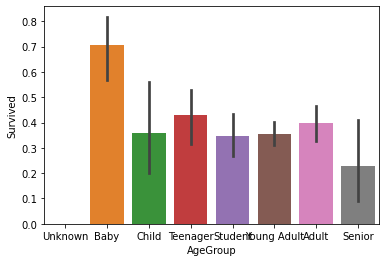

In [5]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [7]:
import plotly.express as px

px.histogram(train, x="Survived", color="Sex")

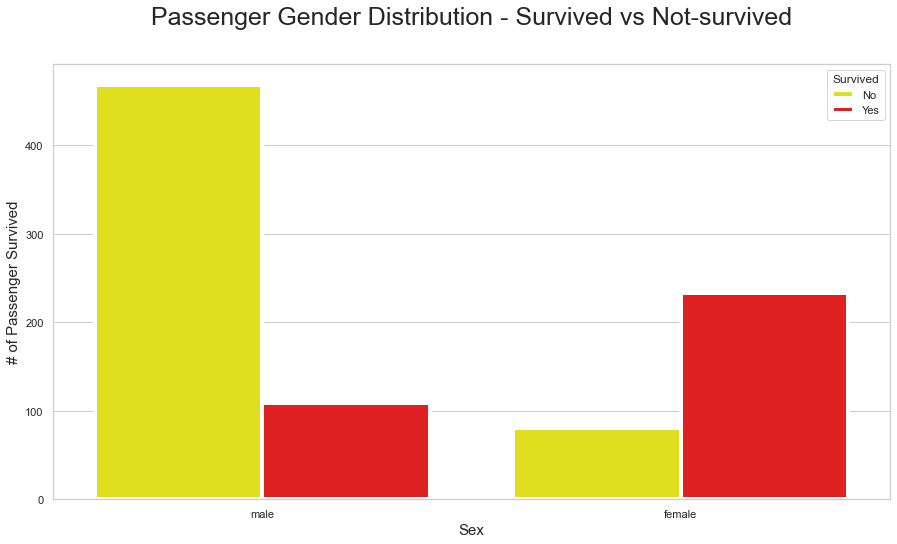

In [8]:
pal = {1:"red", 0:"yellow"}
sns.set(style="whitegrid")
plt.subplots(figsize = (15,8))
#fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
                   palette =pal
                       )

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")


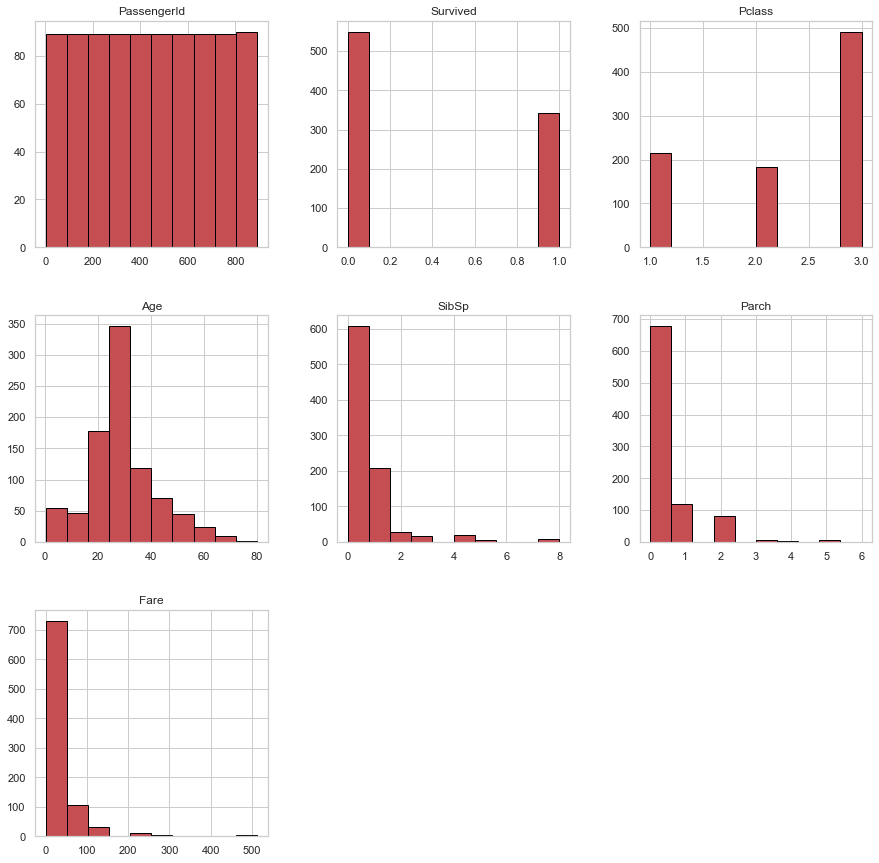

In [9]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train.hist(ax=ax, color='r', edgecolor='black')
plt.show()

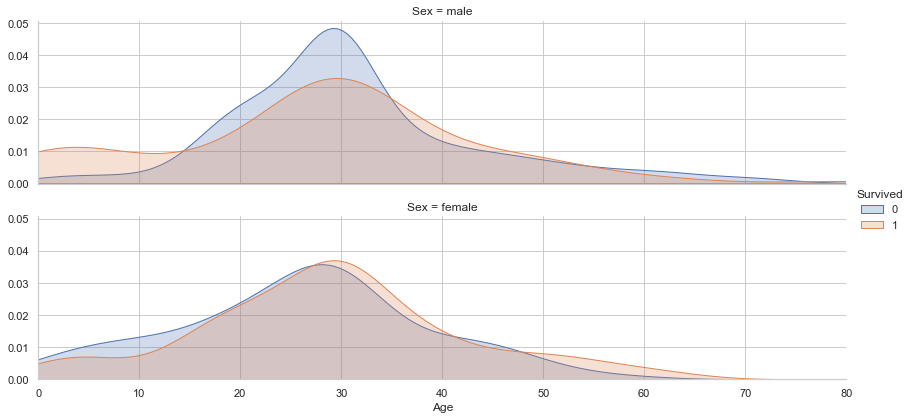

In [10]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
plot_distribution( train , var = 'Age' , target = 'Survived' , row = 'Sex' )


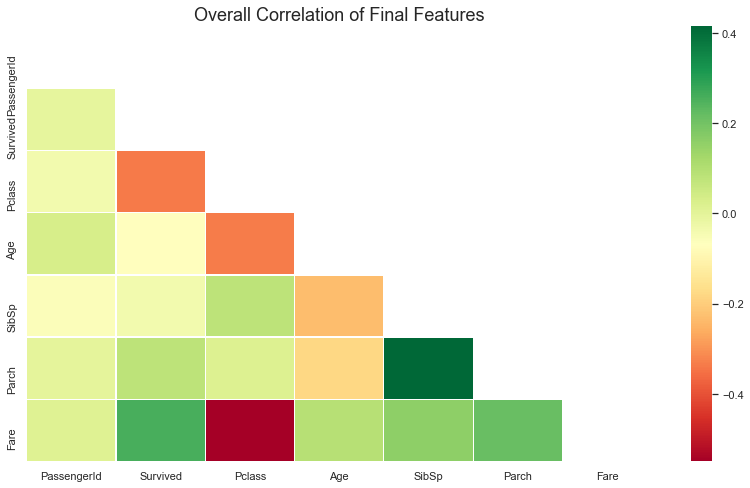

In [11]:
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14, 8))
plt.title('Overall Correlation of Final Features', fontsize=18)
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

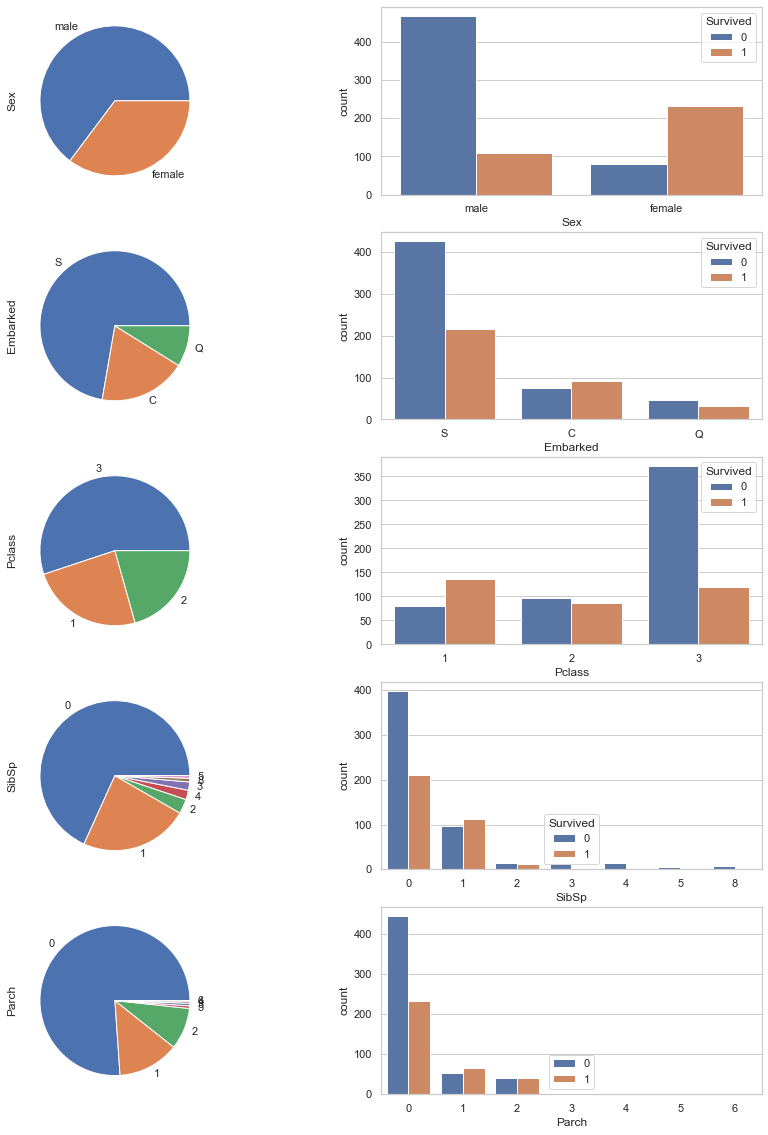

In [12]:
#Autoviz

fig, ax = plt.subplots(ncols=2,nrows=5,figsize=(15, 20))

train['Sex'].value_counts().plot.pie(ax=ax[0,0])
sns.countplot(x='Sex', hue="Survived", data=train,ax=ax[0,1])

train['Embarked'].value_counts().plot.pie(ax=ax[1,0])
sns.countplot(x='Embarked', hue="Survived", data=train,ax=ax[1,1])

train['Pclass'].value_counts().plot.pie(ax=ax[2,0])
sns.countplot(x='Pclass', hue="Survived", data=train,ax=ax[2,1])

train['SibSp'].value_counts().plot.pie(ax=ax[3,0])
sns.countplot(x='SibSp', hue="Survived", data=train,ax=ax[3,1])

train['Parch'].value_counts().plot.pie(ax=ax[4,0])
sns.countplot(x='Parch', hue="Survived", data=train,ax=ax[4,1])

plt.legend()

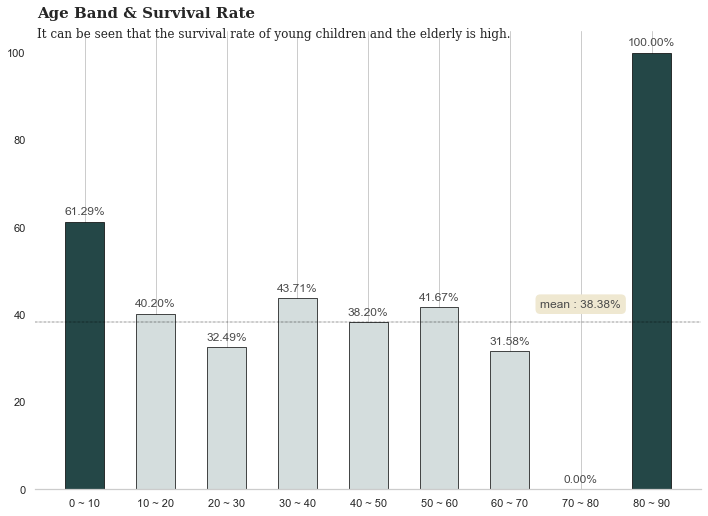

In [13]:
#https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

train['age_band'] = train['Age'].apply(age_band)
titanic_age = train[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = train['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

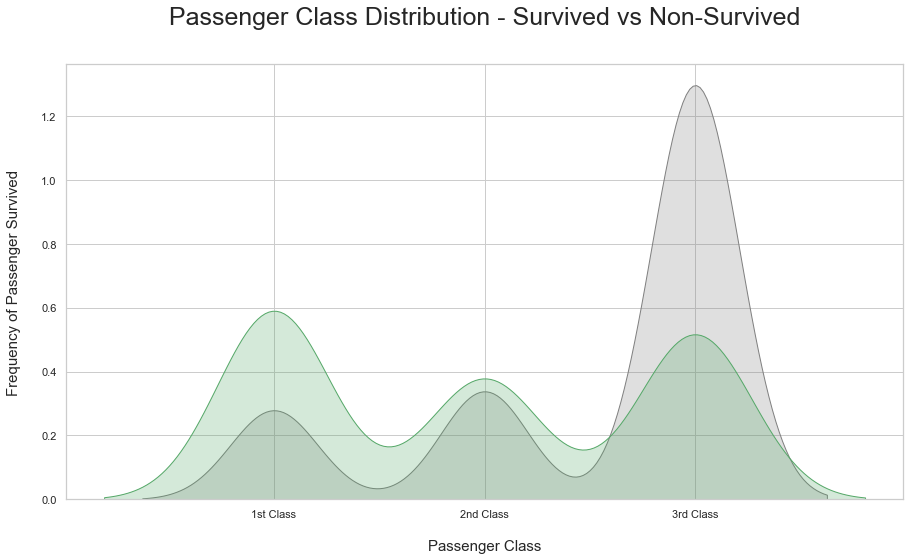

In [14]:
# Density plot
fig = plt.figure(figsize=(15,8),) 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
labels = ['1st Class', '2nd Class', '3rd Class']
plt.xticks(sorted(train.Pclass.unique()), labels);

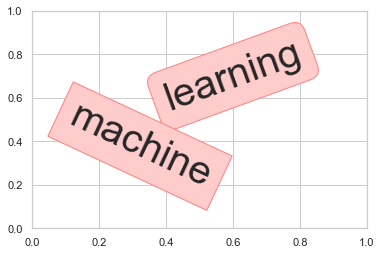

In [15]:
fig = plt.figure()

plt.text(0.6, 0.7, "learning", size=40, rotation=20.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(0.55, 0.6, "machine", size=40, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.show()

In [17]:

import plotly.figure_factory as ff 
  
# Data to be plotted
df = [dict(Task="A", Start='2020-01-01', Finish='2009-02-02'), 
    dict(Task="Job B", Start='2020-03-01', Finish='2020-11-11'), 
    dict(Task="Job C", Start='2020-08-06', Finish='2020-09-21')] 
  
# Creating the plot
fig = ff.create_gantt(df) 
fig.show()

In [18]:
import plotly.graph_objects as go 
import plotly.io as pio
  
  
# Creating the X, Y value that will
# change the values of Z as a function
feature_x = np.arange(0, 50, 2) 
feature_y = np.arange(0, 50, 3) 
  
# Creating 2-D grid of features 
[X, Y] = np.meshgrid(feature_x, feature_y) 
  
Z = np.cos(X / 2) + np.sin(Y / 4) 
  
# plotting the figure
fig = go.Figure(data =
    go.Contour(x = feature_x, y = feature_y, z = Z)) 
  
fig.show()
pio.write_html(fig, file='htmls/heatmap.html', auto_open=True)

In [19]:
import plotly.graph_objects as px
import plotly.express as go
import numpy as np

df = go.data.tips()

x = df['total_bill']
y = df['day']

plot = px.Figure(data=[px.Scatter(
	x=x,
	y=y,
	mode='lines',)
])

plot.update_layout(
	xaxis=dict(
		rangeselector=dict(
			buttons=list([
				dict(count=1,
					step="day",
					stepmode="backward"),
			])
		),
		rangeslider=dict(
			visible=True
		),
	)
)

plot.show()


In [20]:
"""
import random
import plotly
from numpy import *

N = 30     # Number of boxes
print(type(N))
# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour
# and marching around the hue.
c = ["hsl('+str(h)+',50%'+',50%)" for h in linspace(0,
                                                    360, N)]

# Each box is represented by a dict that contains the data, the type,
# and the colour.
# Use list comprehension to describe N boxes, each with a different colour and
# with different randomly generated data:
data = [{
    'y': 3.5*sin(pi * i/N) + i/N+(1.5+0.5*cos(pi*i/N))*random.rand(10),
    'type':'box',
    'marker':{'color': c[i]}
    } for i in range(int(N))]

# format the layout
layout = {'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False},
          'yaxis': {'zeroline':False,'gridcolor':'white'},
          'paper_bgcolor': 'rgb(233,233,233)',
          'plot_bgcolor': 'rgb(233,233,233)',
          }

plotly.offline.plot(data)
"""


'\nimport random\nimport plotly\nfrom numpy import *\n\nN = 30     # Number of boxes\nprint(type(N))\n# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour\n# and marching around the hue.\nc = ["hsl(\'+str(h)+\',50%\'+\',50%)" for h in linspace(0,\n                                                    360, N)]\n\n# Each box is represented by a dict that contains the data, the type,\n# and the colour.\n# Use list comprehension to describe N boxes, each with a different colour and\n# with different randomly generated data:\ndata = [{\n    \'y\': 3.5*sin(pi * i/N) + i/N+(1.5+0.5*cos(pi*i/N))*random.rand(10),\n    \'type\':\'box\',\n    \'marker\':{\'color\': c[i]}\n    } for i in range(int(N))]\n\n# format the layout\nlayout = {\'xaxis\': {\'showgrid\':False,\'zeroline\':False, \'tickangle\':60,\'showticklabels\':False},\n          \'yaxis\': {\'zeroline\':False,\'gridcolor\':\'white\'},\n          \'paper_bgcolor\': \'rgb(233,233,2

In [21]:
import plotly

# create a simple plot
bar = plotly.graph_objs.Bar(x=['giraffes', 'orangutans', 'monkeys'], 
                            y=[20, 14, 23])
layout = plotly.graph_objs.Layout()
fig = plotly.graph_objs.Figure([bar], layout)

# convert it to JSON
fig_json = fig.to_json()

# a simple HTML template
template = """<html>
<head>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
</head>
<body>
    <div id='divPlotly'></div>
    <script>
        var plotly_data = {}
        Plotly.react('divPlotly', plotly_data.data, plotly_data.layout);
    </script>
</body>

</html>"""

# write the JSON to the HTML template
with open('htmls/new_plot.html', 'w') as f:
    f.write(template.format(fig_json))